<a href="https://colab.research.google.com/github/snemmani/ml_ai/blob/master/Lab/Day3_Cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# All imports go below
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

In [3]:
df_train = pd.read_csv("drive/MyDrive/Datasets/Train.txt", sep=",", names=columns)
df_test = pd.read_csv("drive/MyDrive/Datasets/Test.txt", sep=",", names=columns)

In [4]:
df_train.shape

(125973, 43)

In [5]:
df_test.shape

(22544, 43)

In [6]:
df_train.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [8]:
df_train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
df_train[['land', 'urgent', 'numfailedlogins', 'numoutboundcmds']].describe()

,land,urgent,numfailedlogins,numoutboundcmds
count,125973.000000,125973.000000,125973.000000,125973.0
mean,0.000198,0.000111,0.001222,0.0
std,0.014086,0.014366,0.045239,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.0
max,1.000000,3.000000,5.000000,0.0


In [10]:
df_train.drop(['land', 'urgent', 'numfailedlogins', 'numoutboundcmds'], axis=1, inplace=True)
df_test.drop(['land', 'urgent', 'numfailedlogins', 'numoutboundcmds'], axis=1, inplace=True)

In [11]:
df_test.describe()

,duration,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,rootshell,suattempted,numroot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.008428,0.105394,0.442202,0.119899,0.002440,0.000266,0.114665,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.142599,0.928428,0.496659,7.269597,0.049334,0.021060,8.041614,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,3.000000,101.000000,1.000000,796.000000,1.000000,2.000000,878.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
df_train.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [13]:
print(df_train.dropna(axis=1).shape)

(125973, 39)


In [14]:
clean_train = df_train.dropna(axis=1)
clean_test = df_test.dropna(axis=1)

In [15]:
clean_train.select_dtypes(exclude = [np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [16]:
clean_train.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [17]:
clean_train['attack'] = np.where(clean_train['attack'] != 'normal', "attack", "normal")
clean_test['attack'] = np.where(clean_test['attack'] != 'normal', "attack", "normal")

In [18]:
clean_test.attack.unique()

array(['attack', 'normal'], dtype=object)

In [19]:
clean_train.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,attack
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,attack
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,attack


# Convert object column to Numerical type

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clean_train['protocoltype'] = le.fit_transform(clean_train['protocoltype'])
clean_train['service'] = le.fit_transform(clean_train['service'])
clean_train['flag'] = le.fit_transform(clean_train['flag'])
clean_train['attack'] = le.fit_transform(clean_train['attack'])

clean_test['protocoltype'] = le.fit_transform(clean_test['protocoltype'])
clean_test['service'] = le.fit_transform(clean_test['service'])
clean_test['flag'] = le.fit_transform(clean_test['flag'])
clean_test['attack'] = le.fit_transform(clean_test['attack'])

In [21]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  int64  
 2   service                 125973 non-null  int64  
 3   flag                    125973 non-null  int64  
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   wrongfragment           125973 non-null  int64  
 7   hot                     125973 non-null  int64  
 8   loggedin                125973 non-null  int64  
 9   numcompromised          125973 non-null  int64  
 10  rootshell               125973 non-null  int64  
 11  suattempted             125973 non-null  int64  
 12  numroot                 125973 non-null  int64  
 13  numfilecreations        125973 non-null  int64  
 14  numshells           

<Axes: >

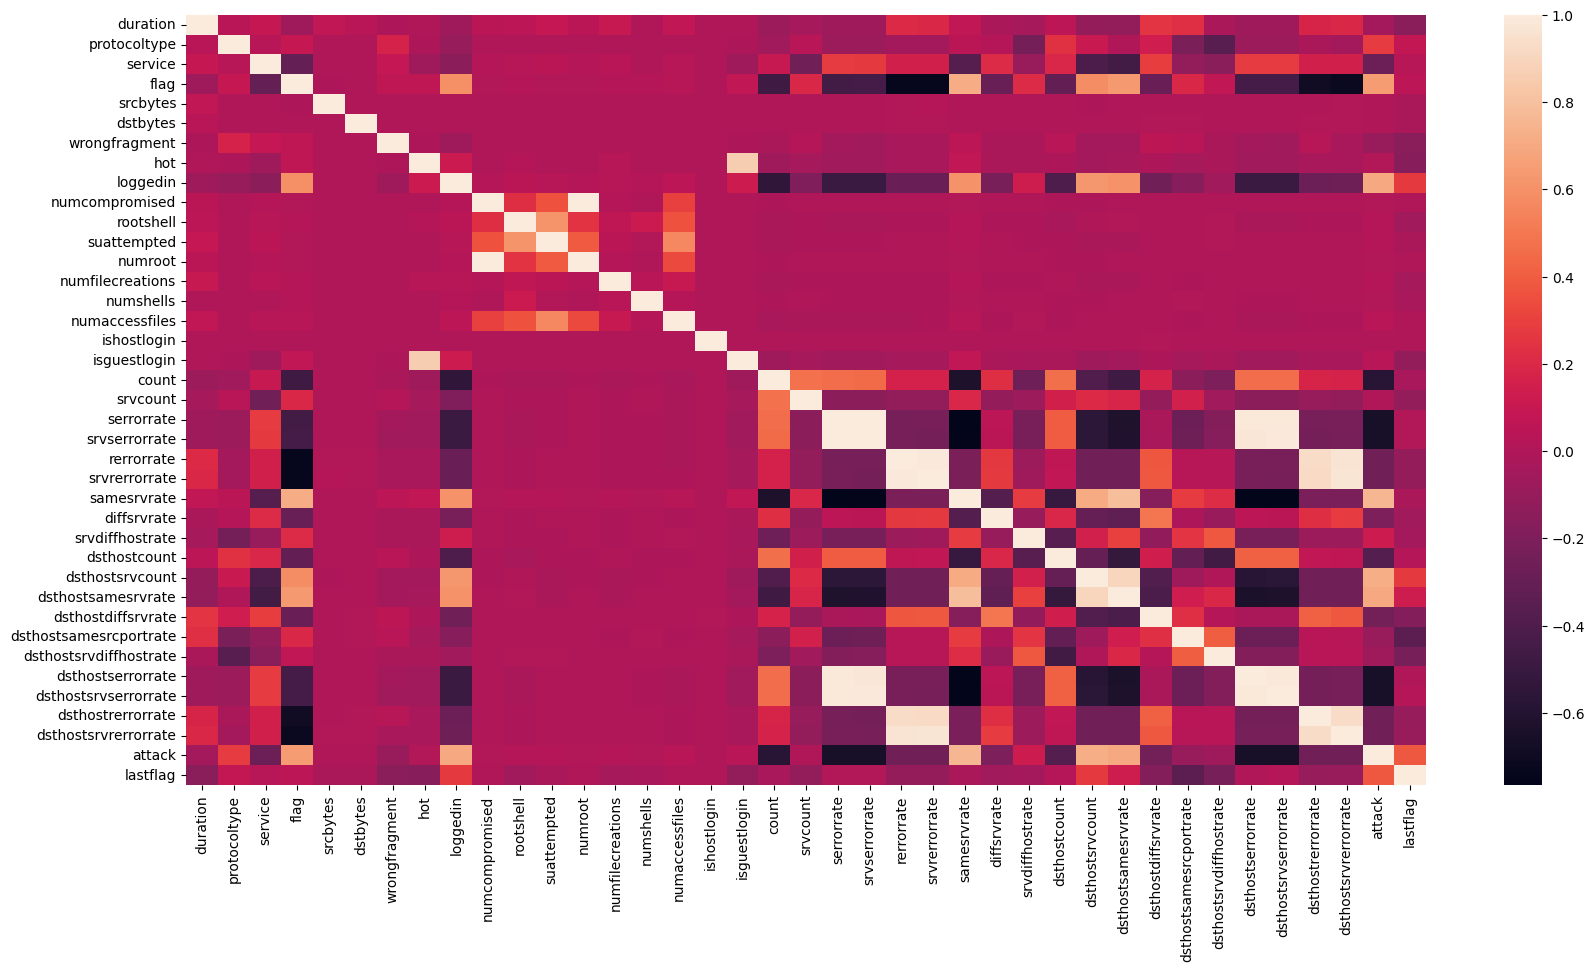

In [22]:
plt.figure(figsize=(20, 10))

sns.heatmap(clean_train.corr())

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = clean_train.drop('attack', axis=1)
y_train = clean_train['attack']

X_test = clean_test.drop('attack', axis=1)
y_test = clean_test['attack']

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
from sklearn.model_selection import train_test_split
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=20000)

lr.fit(X_train_sub, y_train_sub)

preds = lr.predict(X_test_sub)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_sub, preds)

0.9759472904318375

In [27]:
sum(y_test_sub.values == preds)/len(preds)

0.9759472904318375

In [28]:
preds = lr.predict(clean_test.drop('attack', axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [29]:
accuracy_score(clean_test['attack'], preds)

0.7233853797019163

# Hyperparameter optimization

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
lr = LogisticRegression(max_iter=20000)

gs_cv = GridSearchCV(lr, param_grid, cv=5)

# gs_cv.fit(X_train_sub, y_train_sub)
gs_cv.fit(X_test_scaled, y_test)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=20000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']})

In [31]:
gs_cv.best_score_

0.960432915102458

In [32]:
gs_cv.best_estimator_

LogisticRegression(C=100, max_iter=20000)

In [33]:
preds = gs_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, preds)

0.9612757274662882

In [34]:
preds = gs_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, preds)

0.9612757274662882

In [35]:
gs_cv.best_estimator_

LogisticRegression(C=100, max_iter=20000)

# Extracting N-Grams
This demo reads in the binary sequence of a binary file. Creates a list of N grams from a byte sequences and takes a binary file and outputs the n grams count of its binary sequence.

In [36]:
import collections
from nltk import ngrams

file_to_analyse = "./drive/MyDrive/Datasets/malware_detector/Benign PE Samples/HxAccounts.exe"

In [37]:
def read_file(file_path):
  with open(file_path, 'rb') as rh:
    data = rh.read()
  return data

def byte_sequence_to_Ngrams(byte_sequence, N):
  ngram_object = ngrams(byte_sequence, N)
  return list(ngram_object)

def binary_file_to_ngram_counts(file_path, N):
  file_byte_sequence = read_file(file_path)
  file_Ngrams = byte_sequence_to_Ngrams(file_byte_sequence, N)
  return collections.Counter(file_Ngrams)

In [38]:
extracted_Ngrams = binary_file_to_ngram_counts(file_to_analyse, 4)
extracted_Ngrams.most_common(10)

[((0, 0, 0, 0), 15858),
 ((144, 144, 144, 144), 3793),
 ((1, 0, 0, 0), 2909),
 ((255, 255, 255, 255), 1456),
 ((0, 255, 255, 255), 1325),
 ((64, 1, 0, 0), 1263),
 ((2, 0, 0, 0), 1130),
 ((0, 1, 0, 0), 1085),
 ((0, 0, 255, 255), 907),
 ((144, 144, 144, 72), 845)]

## Selecting the best N grams

In [39]:
from os import listdir
from os.path import isfile, join

In [40]:
directories = ["./drive/MyDrive/Datasets/malware_detector/Benign PE Samples", "/content/drive/MyDrive/Datasets/malware_detector/Malicious PE Samples"]
N = 2

In [41]:
ngram_counts_all_files = collections.Counter([])

for dataset_path in directories:
  all_samples = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))]

  for sample in all_samples:
    file_path = join(dataset_path, sample)
    ngram_counts_all_files += binary_file_to_ngram_counts(file_path, N)

In [42]:
K1 = 1000

K1_most_frequent_ngrams = ngram_counts_all_files.most_common(K1)
K1_most_frequent_ngrams_list = [x[0] for x in K1_most_frequent_ngrams]

In [43]:
K1_most_frequent_ngrams_list

[(0, 0),
 (255, 255),
 (72, 139),
 (1, 0),
 (0, 72),
 (204, 204),
 (0, 255),
 (72, 141),
 (144, 144),
 (72, 137),
 (72, 131),
 (255, 21),
 (2, 0),
 (0, 1),
 (255, 72),
 (4, 0),
 (255, 0),
 (64, 1),
 (3, 0),
 (64, 0),
 (0, 139),
 (68, 36),
 (32, 32),
 (133, 192),
 (0, 32),
 (32, 0),
 (72, 133),
 (0, 128),
 (254, 255),
 (0, 144),
 (73, 139),
 (131, 196),
 (131, 236),
 (8, 0),
 (144, 72),
 (101, 0),
 (0, 116),
 (6, 0),
 (5, 0),
 (92, 36),
 (0, 64),
 (7, 0),
 (0, 232),
 (255, 144),
 (42, 42),
 (137, 69),
 (0, 101),
 (128, 0),
 (9, 0),
 (65, 0),
 (76, 139),
 (76, 36),
 (139, 64),
 (192, 116),
 (0, 2),
 (139, 203),
 (116, 0),
 (8, 72),
 (255, 139),
 (0, 233),
 (204, 72),
 (0, 80),
 (137, 68),
 (0, 3),
 (139, 207),
 (139, 206),
 (15, 132),
 (36, 32),
 (76, 141),
 (141, 5),
 (139, 77),
 (0, 16),
 (110, 0),
 (111, 0),
 (114, 0),
 (0, 76),
 (0, 4),
 (32, 72),
 (139, 200),
 (133, 201),
 (51, 192),
 (16, 72),
 (0, 112),
 (105, 0),
 (0, 105),
 (0, 204),
 (0, 111),
 (253, 255),
 (141, 77),
 (0, 97),

In [44]:
def featureize_sample(sample, K1_most_frequent_ngrams_list):
  K1 = len(K1_most_frequent_ngrams_list)
  feature_vector = K1* [0]
  file_ngrams = binary_file_to_ngram_counts(sample, N)

  for i in range(K1):
    feature_vector[i] = file_ngrams[K1_most_frequent_ngrams_list[i]]
  return feature_vector

In [45]:
labels = [("Benign", 0, "./drive/MyDrive/Datasets/malware_detector/Benign PE Samples"), ("Malicious", 1, "/content/drive/MyDrive/Datasets/malware_detector/Malicious PE Samples")]

X = []
y = []

for ltext, label, dataset_path in labels:
  all_samples = [ f for f in listdir(dataset_path) if isfile(join(dataset_path, f))]

  for sample in all_samples:
    file_path = join(dataset_path, sample)
    X.append(featureize_sample(file_path, K1_most_frequent_ngrams_list))
    y.append(label)



In [46]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2

K2 = 10

X = np.array(X)

In [47]:
X_top_K2_freq = X[:, :K2]

In [48]:
mi_selector = SelectKBest(mutual_info_classif, k=K2)
X_top_k2_mi = mi_selector.fit_transform(X_top_K2_freq, y)

In [49]:
chi2_selector = SelectKBest(chi2, k=K2)

X_top_k2_chi = chi2_selector.fit_transform(X_top_k2_mi, y)

In [52]:
! pip install pefile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 2.6 MB/s eta 0:00:00


In [60]:
import pefile

desired_file = join(directories[0], 'HvsiSettingsWorker.exe')

pe = pefile.PE(desired_file)

In [61]:
for entry in pe.DIRECTORY_ENTRY_IMPORT:
  print(entry.dll)
  for imp in entry.imports:
    print("\t", hex(imp.address), imp.name)

b'api-ms-win-crt-runtime-l1-1-0.dll'
	 0x14000a590 b'_initterm'
	 0x14000a598 b'_initterm_e'
	 0x14000a5a0 b'_c_exit'
	 0x14000a5a8 b'_register_thread_local_exe_atexit_callback'
b'api-ms-win-crt-string-l1-1-0.dll'
	 0x14000a5b8 b'memset'
b'api-ms-win-crt-private-l1-1-0.dll'
	 0x14000a468 b'_o__crt_atexit'
	 0x14000a470 b'_o__errno'
	 0x14000a478 b'_o__exit'
	 0x14000a480 b'_o__get_initial_wide_environment'
	 0x14000a488 b'_o__initialize_onexit_table'
	 0x14000a490 b'_o__initialize_wide_environment'
	 0x14000a498 b'_o__invalid_parameter_noinfo'
	 0x14000a4a0 b'_o__invalid_parameter_noinfo_noreturn'
	 0x14000a4a8 b'_o__register_onexit_function'
	 0x14000a4b0 b'_o__seh_filter_exe'
	 0x14000a4b8 b'_o__set_app_type'
	 0x14000a4c0 b'_o__set_fmode'
	 0x14000a4c8 b'_o__set_new_mode'
	 0x14000a4d0 b'memcpy'
	 0x14000a4d8 b'_o__cexit'
	 0x14000a4e0 b'_o__wcsicmp'
	 0x14000a4e8 b'_o__wtoi'
	 0x14000a4f0 b'_o_exit'
	 0x14000a4f8 b'_o_free'
	 0x14000a500 b'_o_malloc'
	 0x14000a508 b'_o_terminate'
	

In [62]:
for section in pe.sections:
  print(
      section.name,
      hex(section.VirtualAddress),
      hex(section.Misc_VirtualSize),
      section.SizeOfRawData,
  )

IMAGE_SECTION_HEADER 0x1000 0x8bbe 35840
IMAGE_SECTION_HEADER 0xa000 0x47f2 18432
IMAGE_SECTION_HEADER 0xf000 0x958 512
IMAGE_SECTION_HEADER 0x10000 0x888 2560
IMAGE_SECTION_HEADER 0x11000 0x10 512
IMAGE_SECTION_HEADER 0x12000 0x70 512


In [63]:
print(pe.dump_info())

----------DOS_HEADER----------

[IMAGE_DOS_HEADER]
0x0        0x0   e_magic:                       0x5A4D    
0x2        0x2   e_cblp:                        0x90      
0x4        0x4   e_cp:                          0x3       
0x6        0x6   e_crlc:                        0x0       
0x8        0x8   e_cparhdr:                     0x4       
0xA        0xA   e_minalloc:                    0x0       
0xC        0xC   e_maxalloc:                    0xFFFF    
0xE        0xE   e_ss:                          0x0       
0x10       0x10  e_sp:                          0xB8      
0x12       0x12  e_csum:                        0x0       
0x14       0x14  e_ip:                          0x0       
0x16       0x16  e_cs:                          0x0       
0x18       0x18  e_lfarlc:                      0x40      
0x1A       0x1A  e_ovno:                        0x0       
0x1C       0x1C  e_res:                         
0x24       0x24  e_oemid:                       0x0       
0x26       0x26

## Computing Hash

In [64]:
import sys
import hashlib

filename = "AI_RMF_Playbook.pdf"

In [69]:
BUF_SIZE = 65356

md5 = hashlib.md5()
sha256 = hashlib.sha256()
sha512 = hashlib.sha512()

with open(filename, 'rb') as f:
  while True:
    data = f.read(BUF_SIZE)
    if not data:
      break
    md5.update(data)
    sha256.update(data)
    sha512.update(data)



In [70]:
print(f"MD5: {md5.hexdigest()}")
print(f"SHA 256: {sha256.hexdigest()}")
print(f"SHA 512: {sha512.hexdigest()}")

MD5: d42d1ab9c46c98835d3302f830f863ee
SHA 256: 8b0540133f737cd70b4d83deb20c53b4841c3f88369fb8de89d5ab3923da3632
SHA 512: c74aaca83a95cbf3decbbb0b8d4be2e36c5bef23889375f4e60f914cd7b4e25363c6f2a819e50c7b38d43f52c0229f83271866d82a18b7bec2a008cfefd781e4
